[View in Colaboratory](https://colab.research.google.com/github/Stallon-niranjan/DeepLearning-Projects/blob/master/Colab_1st_DNN.ipynb)

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


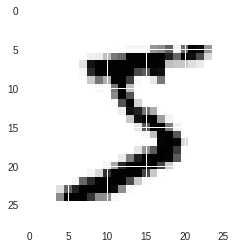

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.2054 - acc: 0.9406
Epoch 2/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0788 - acc: 0.9761
Epoch 3/10
 3424/60000 [>.............................] - ETA: 16s - loss: 0.0553 - acc: 0.9828

60000/60000 [==============================] - 17s 291us/step - loss: 0.0583 - acc: 0.9820
Epoch 4/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0453 - acc: 0.9860
Epoch 5/10
 9824/60000 [===>..........................] - ETA: 14s - loss: 0.0276 - acc: 0.9917

60000/60000 [==============================] - 18s 293us/step - loss: 0.0362 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0290 - acc: 0.9906
Epoch 7/10
11328/60000 [====>.........................] - ETA: 14s - loss: 0.0199 - acc: 0.9945

60000/60000 [==============================] - 17s 291us/step - loss: 0.0243 - acc: 0.9921
Epoch 8/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0189 - acc: 0.9938
Epoch 9/10
11808/60000 [====>.........................] - ETA: 14s - loss: 0.0116 - acc: 0.9968

60000/60000 [==============================] - 17s 291us/step - loss: 0.0160 - acc: 0.9948
Epoch 10/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0125 - acc: 0.9957


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.07476189925150939, 0.9822]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[3.11942996e-21 2.54354135e-19 1.57295834e-13 5.68907366e-09
  7.37320929e-21 8.21245453e-15 2.25644957e-31 1.00000000e+00
  1.65265700e-11 5.04920550e-10]
 [9.07186923e-13 1.74347320e-12 1.00000000e+00 9.14187020e-13
  5.48860181e-25 1.13323913e-15 4.14234827e-11 3.54947926e-28
  2.52978899e-13 6.26097917e-20]
 [3.34180750e-09 9.99954343e-01 8.37729658e-06 1.88018445e-09
  2.37494096e-05 5.09108178e-09 6.85929802e-09 8.31855141e-06
  5.20356707e-06 1.73011203e-10]
 [9.99999762e-01 3.70980744e-18 2.47424703e-09 1.18317967e-14
  7.36434373e-16 1.38280582e-13 2.80126557e-07 4.03620748e-11
  5.10479950e-13 2.03396011e-09]
 [2.11010696e-14 2.14908268e-15 3.52195026e-13 6.04343073e-13
  9.99999762e-01 1.68323851e-18 4.06319545e-15 2.09777356e-12
  2.04276124e-10 2.01346225e-07]
 [1.11436062e-10 9.98991549e-01 1.12706275e-07 1.96930783e-09
  9.05639354e-06 6.85725955e-12 4.12562449e-11 9.89989610e-04
  9.28928603e-06 1.97462624e-09]
 [2.63872813e-19 1.66484057e-12 6.95064717e-09 6.74895426e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

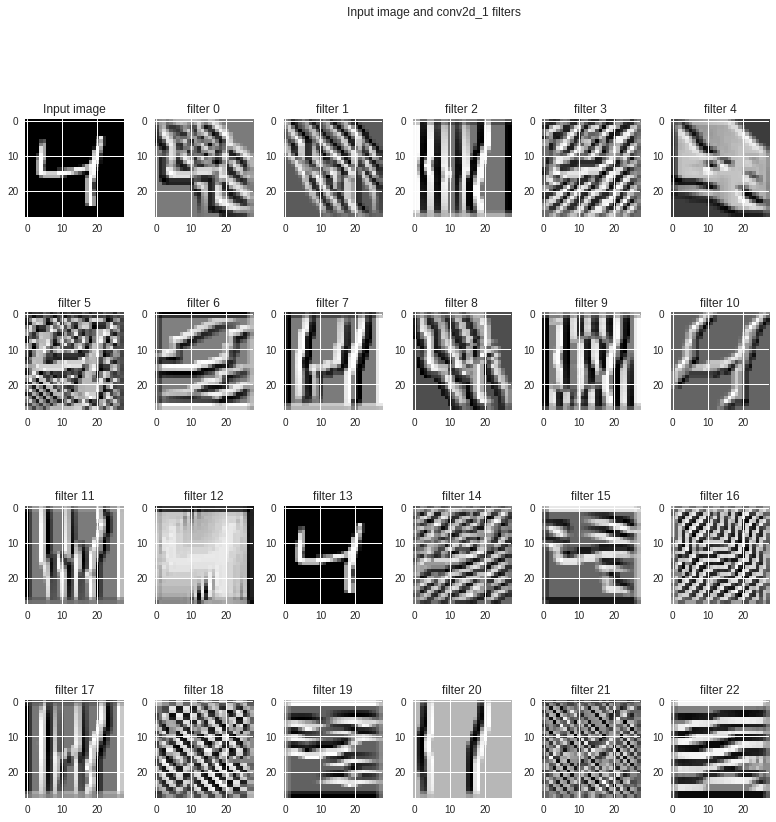

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()